In [ ]:
# !pip install -qU "langchain[openai]"

In [ ]:
import os
import getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"var: ")

_set_env("OPENAI_API_KEY")

: 

In [1]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

llm.invoke("HI!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f7d56a8a2c', 'id': 'chatcmpl-BNLapCQQDcrzdvJWlGmIFaurIicnX', 'finish_reason': 'stop', 'logprobs': None}, id='run-4129e4de-952d-40ad-a870-69ee49d8356c-0', usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    "gpt-4o-mini", 
    model_provider="openai")

model.invoke("Hi what is your model name?")

AIMessage(content="I’m based on OpenAI's GPT-3 model. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 14, 'total_tokens': 34, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BNLc4yJF8B6dQQJLID0HZk2g946AT', 'finish_reason': 'stop', 'logprobs': None}, id='run-28e0e5ca-789b-42f6-b165-9cac9f05188d-0', usage_metadata={'input_tokens': 14, 'output_tokens': 20, 'total_tokens': 34, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
model = init_chat_model("claude-3-5-sonnet-20240620", model_provider="anthropic")

model.invoke("Hi what is your name? Like the model name?")

AIMessage(content="I'm an AI assistant created by Anthropic to be helpful, harmless, and honest. I don't have a specific name or model name that I go by.", additional_kwargs={}, response_metadata={'id': 'msg_01H9AgX4HxR91AHsYH56gEpZ', 'model': 'claude-3-5-sonnet-20240620', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 18, 'output_tokens': 38}, 'model_name': 'claude-3-5-sonnet-20240620'}, id='run-a0f52b2e-c540-4bdb-9192-10f7ebd74db0-0', usage_metadata={'input_tokens': 18, 'output_tokens': 38, 'total_tokens': 56, 'input_token_details': {'cache_read': 0, 'cache_creation': 0}})

# Full LLM App in LangChain

In [3]:
import getpass
import os

try:
    # load environment variables from .env file (requires `python-dotenv`)
    from dotenv import load_dotenv

    load_dotenv()
except ImportError:
    pass

os.environ["LANGSMITH_TRACING"] = "true"
if "LANGSMITH_API_KEY" not in os.environ:
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass(
        prompt="Enter your LangSmith API key (optional): "
    )
if "LANGSMITH_PROJECT" not in os.environ:
    os.environ["LANGSMITH_PROJECT"] = getpass.getpass(
        prompt='Enter your LangSmith Project Name (default = "default"): '
    )
    if not os.environ.get("LANGSMITH_PROJECT"):
        os.environ["LANGSMITH_PROJECT"] = "default"
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass(
        prompt="Enter your OpenAI API key (required if using OpenAI): "
    )

Enter your LangSmith API key (optional):  ········
Enter your LangSmith Project Name (default = "default"):  ········


In [5]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    "gpt-4o-mini",
    model_provider="openai"
)

model.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BNLdUhNVqjm7sGbQ9JYJNKMKHgkC3', 'finish_reason': 'stop', 'logprobs': None}, id='run-e3fc2102-dc7e-4dcf-be31-586bfe12c8c6-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English into Italian"),
    HumanMessage("Hi! Let's learn about large language models!"),
]

model.invoke(messages)

AIMessage(content='Ciao! Impariamo sui modelli di linguaggio di grandi dimensioni!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 27, 'total_tokens': 45, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BNLfsge85D1KImWZUyHLkPOgBFM7Q', 'finish_reason': 'stop', 'logprobs': None}, id='run-660acc99-5f72-401e-8d89-4e3c6292ea98-0', usage_metadata={'input_tokens': 27, 'output_tokens': 18, 'total_tokens': 45, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [7]:
model.invoke([{"role": "user", "content": "How are ya?"}])

AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 11, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BNLgdz4YaipOcVjTZzucczXS7qOMa', 'finish_reason': 'stop', 'logprobs': None}, id='run-5dc518f3-bd1b-4c64-bfff-0ed67a14d70f-0', usage_metadata={'input_tokens': 11, 'output_tokens': 29, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [12]:
for token in model.stream("Tell me the 3 funniest jokes you know"):
    print(token.content, end="|")

|Sure|!| Here| are| three| jokes| that| might| give| you| a| chuck|le|:

|1|.| **|Why| don|’t| scientists| trust| atoms|?|**
|  | Because| they| make| up| everything|!

|2|.| **|Why| did| the| scare|crow| win| an| award|?|**
|  | Because| he| was| outstanding| in| his| field|!

|3|.| **|I| told| my| wife| she| was| drawing| her| eyebrows| too| high|.|**
|  | She| looked| surprised|!

|I| hope| one| of| these| brings| a| smile| to| your| face|!||

In [13]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following from {language_source} into {language_target}"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("human", "{input_sentence}")]
)

prompt_template.format(language_source="English", language_target="French", input_sentence="I love programming in Python")

'System: Translate the following from English into French\nHuman: I love programming in Python'

In [14]:
prompt = prompt_template.invoke({"language_source": "English", "language_target": "French", "input_sentence": "I love programming in Python"})
response = model.invoke(prompt)
response

AIMessage(content="J'adore programmer en Python.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 23, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BNLleREclnRbIkMfVOf5WA40UVC3D', 'finish_reason': 'stop', 'logprobs': None}, id='run-f29bd84b-3dd0-425e-a32d-32febfdf4ef4-0', usage_metadata={'input_tokens': 23, 'output_tokens': 7, 'total_tokens': 30, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [15]:
response.content

"J'adore programmer en Python."

In [16]:
chain = prompt_template | model

response = chain.invoke({"language_source": "English", "language_target": "Italian", "input_sentence": "Lucas is a gorgeous bald teacher."})

In [17]:
response.content

'Lucas è un bellissimo insegnante calvo.'

# Structured Outputs

In [18]:
from pydantic import BaseModel, Field
from openai import OpenAI

class ElementsOfLiveCourse(BaseModel):
    title: str = Field(description="The title of the live course")
    topic: str = Field(description="The core topic of the live course")
    example_lesson: str = Field(description="An example lesson from the live course")

with open("./mcp_course_example.txt", "r") as f:
    prompt_raw_course = f.read()

client = OpenAI()

response = client.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You take in raw information for a course and\
            you output the structured objects with information about that course"},
        {"role": "user", "content": prompt_raw_course}
    ],
    response_format=ElementsOfLiveCourse
)

response

ParsedChatCompletion[ElementsOfLiveCourse](id='chatcmpl-BNLt735W3OJ6UgQBQGvEEmFqXzK35', choices=[ParsedChoice[ElementsOfLiveCourse](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[ElementsOfLiveCourse](content='{"title":"Model Context Protocol (MCP) Introduction","topic":"Connecting AI Systems with Data Sources","example_lesson":"Understanding the Architecture of the Model Context Protocol: This lesson covers how to set up your first MCP server, the importance of a standard protocol in AI development, and walkthroughs of pre-built MCP servers for platforms like Google Drive and Slack."}', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None, parsed=ElementsOfLiveCourse(title='Model Context Protocol (MCP) Introduction', topic='Connecting AI Systems with Data Sources', example_lesson='Understanding the Architecture of the Model Context Protocol: This lesson covers how to set up your first MCP server, the importa

In [23]:
response.choices[0].message.parsed

ElementsOfLiveCourse(title='Model Context Protocol (MCP) Introduction', topic='Connecting AI Systems with Data Sources', example_lesson='Understanding the Architecture of the Model Context Protocol: This lesson covers how to set up your first MCP server, the importance of a standard protocol in AI development, and walkthroughs of pre-built MCP servers for platforms like Google Drive and Slack.')

In [24]:
from IPython.display import Markdown

str_output = f"""
# {response.choices[0].message.parsed.title}

- *Topic*: {response.choices[0].message.parsed.topic}
- *Example Lesson*: {response.choices[0].message.parsed.example_lesson}
"""
Markdown(str_output)


# Model Context Protocol (MCP) Introduction

- *Topic*: Connecting AI Systems with Data Sources
- *Example Lesson*: Understanding the Architecture of the Model Context Protocol: This lesson covers how to set up your first MCP server, the importance of a standard protocol in AI development, and walkthroughs of pre-built MCP servers for platforms like Google Drive and Slack.


In [25]:
llm = init_chat_model("gpt-4o-mini", model_provider="openai")

llm.invoke("What are the elements of a Screenplay?")

AIMessage(content='A screenplay is a blueprint for a film or television show, and it typically contains several key elements that help convey the story, character development, and visual storytelling. Here are the main elements of a screenplay:\n\n1. **Title Page**: This includes the title of the screenplay, the writer\'s name, and contact information.\n\n2. **Act Structure**: Most screenplays follow a three-act structure:\n   - **Act One**: Sets up the story, introduces the characters, and establishes the setting and conflict.\n   - **Act Two**: The main part of the story where tension builds, complications arise, and characters face challenges.\n   - **Act Three**: Resolution where conflicts are resolved, and the story concludes.\n\n3. **Scene Headings (Slug Lines)**: These indicate the location and time of day for each scene, usually formatted in all caps (e.g., "EXT. PARK - DAY").\n\n4. **Action Lines**: Descriptive text that conveys what is happening in the scene. It should be cle

## Pydantic Class

In [26]:
from typing import Optional
from pydantic import BaseModel, Field


# Pydantic
class ElementsOfScreenplay(BaseModel):
    """Elements of a Screenplay."""
    
    title: str = Field(description="The title of the screenplay")
    genre: str = Field(description="The genre of the screenplay")
    protagonist: str = Field(description="The protagonist of the screenplay")
    antagonist: str = Field(description="The antagonist of the screenplay")
    setting: str = Field(description="The setting of the screenplay")
    plot: str = Field(description="The plot of the screenplay")


structured_llm = llm.with_structured_output(ElementsOfScreenplay)

screenplay_structured = structured_llm.invoke("Structure a Screenplay about characters afraid of becoming outdated.")

In [27]:
from IPython.display import Markdown

str_output = f"""
# {screenplay_structured.title}

- *Genre*: {screenplay_structured.genre}
- *Protagonist*: {screenplay_structured.protagonist}
- *Antagonist*
- *Setting*: {screenplay_structured.setting}

### Plot

{screenplay_structured.plot}
"""
Markdown(str_output)


# Timeless

- *Genre*: Drama/Sci-Fi
- *Protagonist*: Ella, a talented but obsolete tech designer
- *Antagonist*
- *Setting*: A near-future city where advanced technology dictates lifestyle and careers

### Plot

In a world where rapid technological changes leave many in the dust, Ella, a talented but outdated tech designer, struggles with the fear of becoming irrelevant. As she tries to adapt her skills to new advancements, she stumbles upon a group of like-minded individuals, each dealing with their own obsolescence. Together, they form a support network to confront their fears, share their experiences, and ultimately create a unique product that blends their old skills with the new technology. They must overcome their insecurities and societal pressure to prove that being 'outdated' doesn't mean being irrelevant, but rather it offers a unique perspective that can innovate the future.


# Model + Tools

In [18]:
from langchain_community.tools.tavily_search import TavilySearchResults

model = init_chat_model("gpt-4o-mini", model_provider="openai")
search = TavilySearchResults(max_results=2)
tools = [search]

model_with_tools = model.bind_tools(tools)

model_with_tools.invoke("Who is in the NBA playoffs?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ly2eaQ52W3F9AdEsDxFN45AZ', 'function': {'arguments': '{"query":"NBA playoffs standings 2024"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 86, 'total_tokens': 110, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BNJTNmMn4XSStmOW2lCqRtoh1YjPJ', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-8d186d28-4811-4390-9ce9-1e09e8b82d78-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'NBA playoffs standings 2024'}, 'id': 'call_ly2eaQ52W3F9AdEsDxFN45AZ', 'type': 'tool_call'}], usage_metadata={'input_tokens': 86, 'output_tokens': 24, 't

The output we get here is something called a "tool call" which means, prepared arguments for a pre-defined function (in this case
web search with the tavily API) to gather the required information.

Now let's look at a full agent.

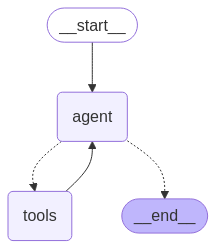

In [19]:
# Import relevant functionality
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

# Create the agent
memory = MemorySaver()
model = init_chat_model("gpt-4o-mini", model_provider="openai")
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(model, tools, checkpointer=memory)

agent_executor

Agent Executor is a graph!

In [20]:
# We pass config because this agent has memory so we need to pass a thread_id
config = {"configurable": {"thread_id": "abc123"}}
# Below we can't just invoke on "input" we use "messages" because the agent expects a list of messages (this info is hidden in the create_react_agent function)
agent_executor.invoke({"messages": [HumanMessage("What is the capital of Brazil?")]}, config=config)

{'messages': [HumanMessage(content='What is the capital of Brazil?', additional_kwargs={}, response_metadata={}, id='fb5ac64a-1673-4fc8-beb3-cc0c4d9f3537'),
  AIMessage(content='The capital of Brazil is Brasília.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 86, 'total_tokens': 95, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BNJTURD4jrzdaywXh0GN9bajA0SJT', 'finish_reason': 'stop', 'logprobs': None}, id='run-14562f84-daa1-4f0b-9c53-9437d8da8396-0', usage_metadata={'input_tokens': 86, 'output_tokens': 9, 'total_tokens': 95, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [21]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather in sf?")]},
    stream_mode="values",
    config=config
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

whats the weather in sf?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_84H6hzlRl7jbrWO5Ijv5A3QN)
 Call ID: call_84H6hzlRl7jbrWO5Ijv5A3QN
  Args:
    query: San Francisco weather
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Weather in San Francisco", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1744895853, 'localtime': '2025-04-17 06:17'}, 'current': {'last_updated_epoch': 1744895700, 'last_updated': '2025-04-17 06:15', 'temp_c': 11.7, 'temp_f': 53.1, 'is_day': 0, 'condition': {'text': 'Light rain', 'icon': '//cdn.weatherapi.com/weather/64x64/night/296.png',

In [22]:
# !pip install langchain-ollama

from langchain.chat_models import init_chat_model

local_llm = init_chat_model("mistral-small3.1", model_provider="ollama")

local_llm.invoke("What is the capital of Brazil?")

AIMessage(content='The capital of Brazil is Brasília.', additional_kwargs={}, response_metadata={'model': 'mistral-small3.1', 'created_at': '2025-04-17T13:21:57.316434Z', 'done': True, 'done_reason': 'stop', 'total_duration': 5757739125, 'load_duration': 3368140834, 'prompt_eval_count': 365, 'prompt_eval_duration': 2024199334, 'eval_count': 9, 'eval_duration': 352367625, 'model_name': 'mistral-small3.1'}, id='run-eb9c26a4-c4b1-467a-b867-0bc678697adf-0', usage_metadata={'input_tokens': 365, 'output_tokens': 9, 'total_tokens': 374})

In [23]:
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(local_llm, tools)

In [24]:
agent_executor.invoke({"messages": [HumanMessage("Which teams are officialy on the playoffs in the NBA right now?")]})

{'messages': [HumanMessage(content='Which teams are officialy on the playoffs in the NBA right now?', additional_kwargs={}, response_metadata={}, id='da3f4b02-7526-4f53-a124-5642a418a144'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'mistral-small3.1', 'created_at': '2025-04-17T13:21:59.119554Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1780826416, 'load_duration': 15985291, 'prompt_eval_count': 457, 'prompt_eval_duration': 574323292, 'eval_count': 28, 'eval_duration': 1188992625, 'model_name': 'mistral-small3.1'}, id='run-609a43b6-8a0d-4ad1-898f-d396b22313c3-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'NBA playoff teams 2024'}, 'id': '1cef9b20-853c-4297-8c84-7f587f64eb12', 'type': 'tool_call'}], usage_metadata={'input_tokens': 457, 'output_tokens': 28, 'total_tokens': 485}),
  ToolMessage(content='[{"title": "2024 NBA Playoffs | Official Bracket, Schedule and Series Matchups", "url": "https://www.nba.com/playoff